In [1]:
import numpy as np
import tensorflow as tf

### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
X = data[:,0:1]
y = data[:,1:]

print(X)
print(y)

[[6.7]
 [4.6]
 [3.5]
 [5.5]]
[[9.1]
 [5.9]
 [4.6]
 [6.7]]


In [2]:
### Create model
class Model(object):
    def __init__(self):
        self.W = tf.Variable(-0.34)
        self.b = tf.Variable(0.04)
    
    def __call__(self, x):
        return self.W*x + self.b

In [12]:
import numpy as np
import tensorflow as tf

### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
m = 4
X = data[:,0:1]
y = data[:,1:]

### Create model
class Model(object):
    def __init__(self):
        self.W = tf.Variable(-0.34)
        self.b = tf.Variable(0.04)
    
    def __call__(self, x):
        return self.W*x + self.b
    
model = Model()

In [5]:
print(X)
print(X.shape)

[[6.7]
 [4.6]
 [3.5]
 [5.5]]
(4, 1)


In [6]:
y_hat = model(X)
print(y_hat)

tf.Tensor(
[[-2.238    ]
 [-1.524    ]
 [-1.1500001]
 [-1.83     ]], shape=(4, 1), dtype=float32)


In [7]:
y

array([[9.1],
       [5.9],
       [4.6],
       [6.7]])

In [8]:
loss = (y_hat-y)**2
print(loss)

tf.Tensor(
[[128.55025 ]
 [ 55.11578 ]
 [ 33.0625  ]
 [ 72.760895]], shape=(4, 1), dtype=float32)


In [11]:
loss_np = loss.numpy()
print(loss_np)
print(type(loss_np))

[[128.55025 ]
 [ 55.11578 ]
 [ 33.0625  ]
 [ 72.760895]]
<class 'numpy.ndarray'>


In [13]:
### training
learning_rate = 0.01
epochs = 100

losses = []
for epoch in range(epochs):
    with tf.GradientTape() as t:
        # y_hat
        y_hat = model(X)
        
        # loss
        loss_v = tf.reduce_mean(tf.square(y_hat - y))
                
        # debug
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [model.W, model.b])
        
        # update
        model.W.assign_sub(learning_rate * dW)
        model.b.assign_sub(learning_rate * db)

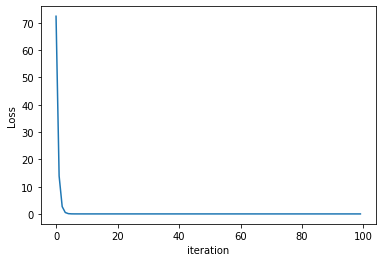

In [14]:
import matplotlib.pyplot as plt

# plot losses
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [15]:
model.W

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.2492946>

In [16]:
model.b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.26723063>

In [17]:
y_hat = model(X)
print(y_hat)

tf.Tensor(
[[8.637505 ]
 [6.0139856]
 [4.639762 ]
 [7.138351 ]], shape=(4, 1), dtype=float32)
